In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv(r"C:\Users\cesst\OneDrive\Desktop\Evolve\ml\Taxi\TaxiFairDetermine\Dataset\cleaned_taxi_trip_pricing.csv")

In [98]:
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,0,0,3,0,0,3.560000,0.800000,0.320000,53.82,36.262400
1,47.590000,1,0,1,1,0,3.502989,0.620000,0.430000,40.57,56.874773
2,36.870000,2,1,1,1,0,2.700000,1.210000,0.150000,37.27,52.903200
3,30.330000,2,0,4,0,0,3.480000,0.510000,0.150000,116.81,36.469800
4,27.070547,2,0,3,1,0,2.930000,0.630000,0.320000,22.64,15.618000
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,1,1,4,2,0,2.390000,0.620000,0.490000,58.39,34.404900
996,45.950000,3,0,4,2,0,3.120000,0.610000,0.292916,61.96,62.129500
997,7.700000,0,0,3,0,1,2.080000,1.780000,0.292916,54.18,33.123600
998,47.560000,0,0,1,0,0,2.670000,0.820000,0.170000,114.94,61.209000


In [99]:
data.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

<Axes: >

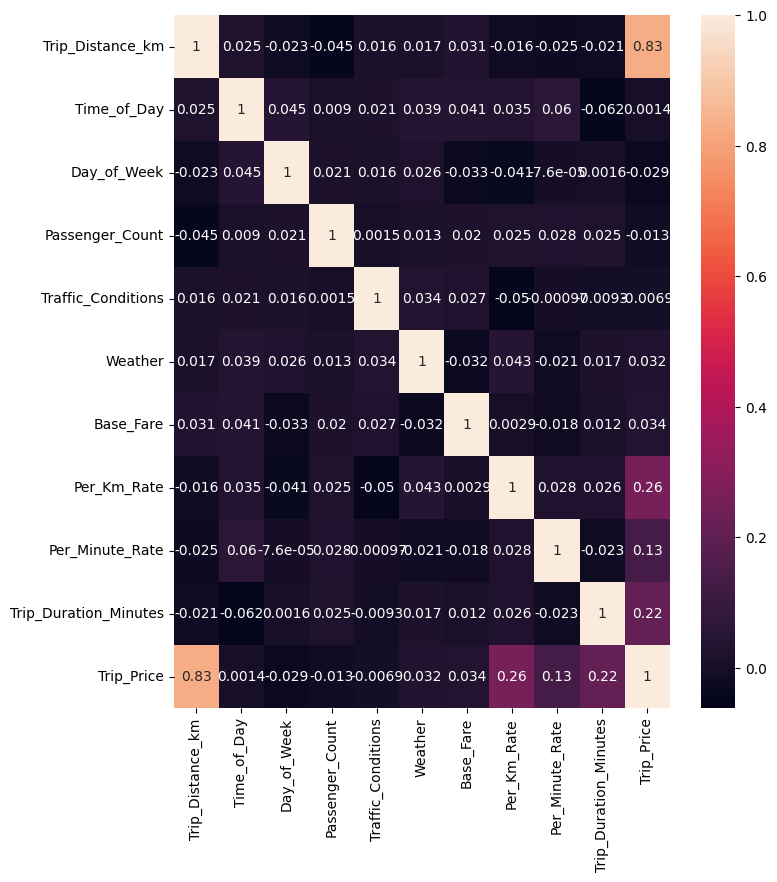

In [100]:
plt.figure(figsize=(8,9))
sns.heatmap(data.corr(),annot=True)

In [101]:
data.drop(["Time_of_Day","Traffic_Conditions"],axis=1,inplace=True)

In [102]:
data

,Trip_Distance_km,Day_of_Week,Passenger_Count,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,0,3,0,3.560000,0.800000,0.320000,53.82,36.262400
1,47.590000,0,1,0,3.502989,0.620000,0.430000,40.57,56.874773
2,36.870000,1,1,0,2.700000,1.210000,0.150000,37.27,52.903200
3,30.330000,0,4,0,3.480000,0.510000,0.150000,116.81,36.469800
4,27.070547,0,3,0,2.930000,0.630000,0.320000,22.64,15.618000
...,...,...,...,...,...,...,...,...,...
995,5.490000,1,4,0,2.390000,0.620000,0.490000,58.39,34.404900
996,45.950000,0,4,0,3.120000,0.610000,0.292916,61.96,62.129500
997,7.700000,0,3,1,2.080000,1.780000,0.292916,54.18,33.123600
998,47.560000,0,1,0,2.670000,0.820000,0.170000,114.94,61.209000


In [103]:
data.shape

(1000, 9)

In [104]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [105]:
X = data.drop("Trip_Price",axis=1)

In [106]:
y = data["Trip_Price"]

In [107]:
X

,Trip_Distance_km,Day_of_Week,Passenger_Count,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.350000,0,3,0,3.560000,0.800000,0.320000,53.82
1,47.590000,0,1,0,3.502989,0.620000,0.430000,40.57
2,36.870000,1,1,0,2.700000,1.210000,0.150000,37.27
3,30.330000,0,4,0,3.480000,0.510000,0.150000,116.81
4,27.070547,0,3,0,2.930000,0.630000,0.320000,22.64
...,...,...,...,...,...,...,...,...
995,5.490000,1,4,0,2.390000,0.620000,0.490000,58.39
996,45.950000,0,4,0,3.120000,0.610000,0.292916,61.96
997,7.700000,0,3,1,2.080000,1.780000,0.292916,54.18
998,47.560000,0,1,0,2.670000,0.820000,0.170000,114.94


In [108]:
y

0      36.262400
1      56.874773
2      52.903200
3      36.469800
4      15.618000
         ...    
995    34.404900
996    62.129500
997    33.123600
998    61.209000
999    45.443700
Name: Trip_Price, Length: 1000, dtype: float64

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42 ,test_size=0.2)

In [110]:
scaler = StandardScaler()

In [111]:
X_train_scaled = scaler.fit_transform(X_train)

In [112]:
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled

array([[-1.20125355, -0.65660263, -0.4168793 , ...,  1.24423834,
        -0.81454283,  0.53497252],
       [ 0.96682812,  1.52299116, -1.35897942, ...,  1.2203866 ,
        -1.34563737,  0.848815  ],
       [ 0.16038647, -0.65660263,  1.46732093, ...,  0.17090997,
        -0.54899557, -1.47898475],
       ...,
       [ 0.55843464,  1.52299116, -1.35897942, ...,  0.76720351,
         1.22131955,  0.10735809],
       [ 0.37862328, -0.65660263, -1.35897942, ..., -0.06760745,
        -1.25712161,  0.56632444],
       [-0.55491791, -0.65660263, -1.35897942, ..., -0.44923531,
         0.33616199,  1.37533344]], shape=(800, 8))

In [114]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
svr = SVR()
linear = LinearRegression()
forest = RandomForestRegressor()
gradient = GradientBoostingRegressor()

In [116]:
classifiers={
    'LinearRegression': linear, 
    'SVR':svr, 
    'RandomForestRegressor':forest, 
    'GradientBoostingRegressor':gradient
}

In [117]:
for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train) 
    m_pred=model.predict(X_test_scaled) 
    mae = mean_absolute_error(y_test, m_pred)
    mse = mean_squared_error(y_test, m_pred)
    r2 = r2_score(y_test, m_pred) 
    print(f"the accuracy score of {name} is mae:{mae}, mse:{mae}, r2:{r2}") 

the accuracy score of LinearRegression is mae:9.926224374368621, mse:9.926224374368621, r2:0.7662229512772454
the accuracy score of SVR is mae:11.146211436120188, mse:11.146211436120188, r2:0.5150992840576243
the accuracy score of RandomForestRegressor is mae:5.432768397447749, mse:5.432768397447749, r2:0.9281289090670436
the accuracy score of GradientBoostingRegressor is mae:5.028545990259639, mse:5.028545990259639, r2:0.9313229839556605


In [118]:
try_data ={
    'Trip_Distance_km': 19.35,
    'Day_of_Week': 0,  
    'Passenger_Count': 3,
    'Weather': 0,
    'Base_Fare': 3.56,
    'Per_Km_Rate': 0.8,
    'Per_Minute_Rate': 0.32,
    'Trip_Duration_Minutes': 53.82
}

In [119]:
try_array = np.array([
    try_data['Trip_Distance_km'],
    try_data['Day_of_Week'],
    try_data['Passenger_Count'],
    try_data['Weather'],
    try_data['Base_Fare'],
    try_data['Per_Km_Rate'],
    try_data['Per_Minute_Rate'],
    try_data['Trip_Duration_Minutes']
]).reshape(1,-1)

In [120]:
try_array_scaled = scaler.transform(try_array)

C:\Users\cesst\OneDrive\Desktop\Evolve\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
forest.predict(try_array_scaled)

array([36.121515])

In [123]:
import joblib

In [124]:
joblib.dump(forest,"forest_model.pkl")

['forest_model.pkl']